In [2]:
import pytesseract as pt
from PIL import Image
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [3]:
pt.pytesseract.tesseract_cmd = 'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

In [260]:
def img_size(image):
    size = len(image) * len(image[0])
    return size

In [261]:
def get_gray_arr(image):
    grayscale_array = []
    for w in range(0,len(img[0])):
        for h in range(0,len(img)):
            #intensity = image.getpixel((h,w))
            intensity = image[h,w]
            grayscale_array.append(intensity)
    return grayscale_array

In [262]:
def get_hist(image):
    #grayscale_array = get_gray_arr(image)
    bins = range(0,257)
    img_histogram = np.histogram(image, bins)
    return img_histogram

In [263]:
def otsu(image, do_savefile):
    hist = get_hist(image)
    size = img_size(image)
    current_max, th = 0, 0
    sumT, sumF, sumB = 0, 0, 0
    for i in range(0,256):
        sumT += i * hist[0][i]
    weightB, weightF = 0, 0
    varBetween, meanB, meanF = 0, 0, 0
    for i in range(0,256):
        weightB += hist[0][i]
        weightF = size - weightB
        if weightF == 0:
            break
        sumB += i*hist[0][i]
        sumF = sumT - sumB
        meanB = sumB/weightB
        meanF = sumF/weightF
        varBetween = weightB * weightF
        varBetween *= (meanB-meanF)*(meanB-meanF)
        if varBetween > current_max:
            current_max = varBetween
            th = i 
    #print ("threshold is:", th)
    
    ret,thresh = cv.threshold(image,th,255,cv.THRESH_BINARY)
    if do_savefile:
        cv.imwrite(f'{file_name}_global.png',thresh)
    return thresh

2


<ipython-input-263-14961ab0ad08>:17: RuntimeWarning: invalid value encountered in longlong_scalars
  meanB = sumB/weightB


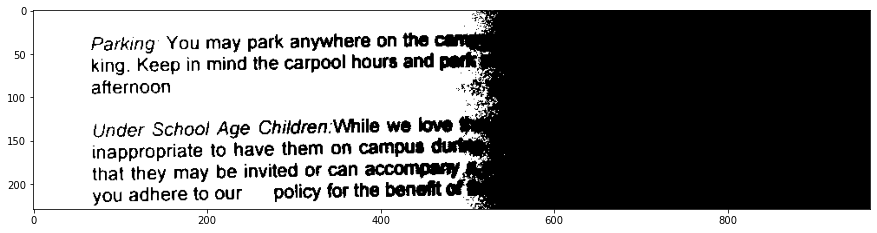

In [264]:
file_name = "sample01.png"
try:
    #img = Image.open(file_name)
    #img.load()
    #img.show()
    img = cv.imread(file_name,0)
    #bw = img.convert('L')
    #bw.show()
    print(img.ndim)
    if img.ndim > 2:
        img = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
except IOError:
    print ("Unable to open file. Please try another format.")

thresh = otsu(img,True)
plt.figure(figsize=(15,10))
plt.imshow(thresh,'gray')

In [270]:
def adaptive_thresh(image, num_row, num_col):
    images_dict = {}
    processed_img = image
    print(len(image))
    print(len(image[0]))
    interval_height = int(np.ceil(len(image)/num_row))
    interval_width = int(np.ceil(len(image[0])/num_col))
    print(interval_height,interval_width)
    for col in range(num_col):
        for row in range(num_row):
            lower_bound_h = row * interval_height
            upper_bound_h = (row+1) * interval_height
            lower_bound_w = col * interval_width
            upper_bound_w = (col+1) * interval_width
            if upper_bound_h > len(image):
                upper_bound_h = len(image)
            if upper_bound_w > len(image[0]):
                upper_bound_w = len(image[0])
            img_snip = image[lower_bound_h:upper_bound_h, lower_bound_w:upper_bound_w]
            if img_snip.size == 0:
                continue
            processed_img[lower_bound_h:upper_bound_h, lower_bound_w:upper_bound_w] = otsu(img_snip, False)
    return processed_img

In [296]:
file_name = 'sample01'
image = cv.imread('sample01.png',0)
processed = adaptive_thresh(image, 3, 13)

229
965
77 75


<ipython-input-263-14961ab0ad08>:17: RuntimeWarning: invalid value encountered in longlong_scalars
  meanB = sumB/weightB


True

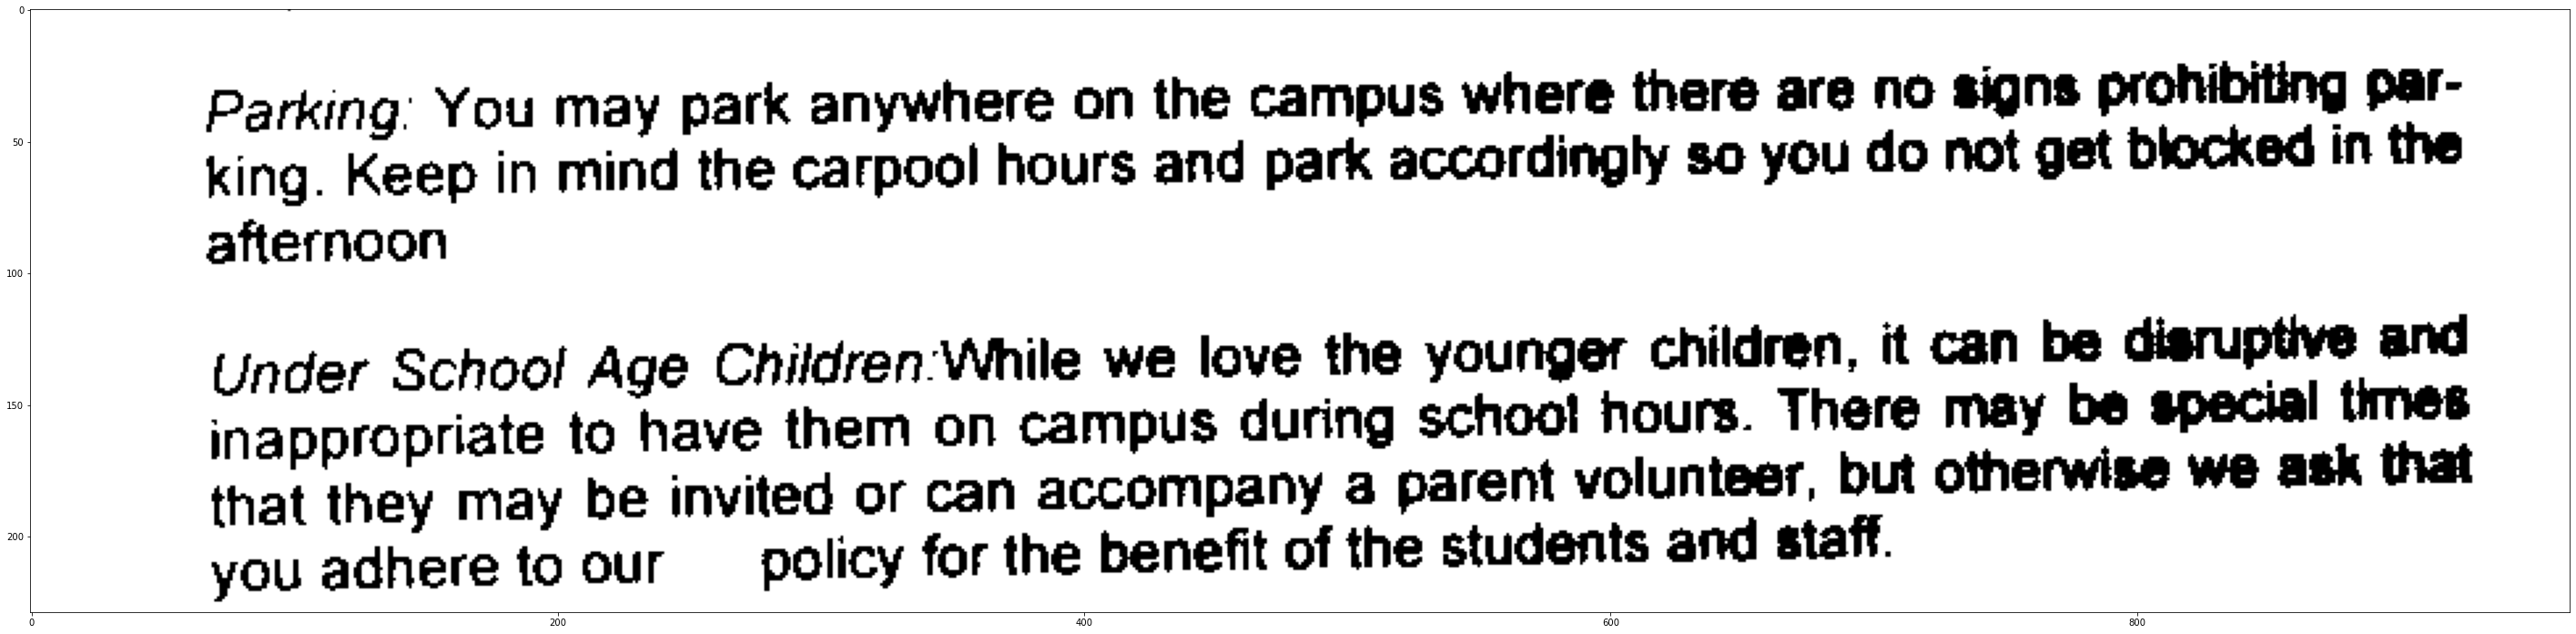

In [297]:
plt.figure(figsize=(50,50))
plt.imshow(processed,'gray')
cv.imwrite(f'{file_name}_adaptive.png',processed)

In [250]:
image = cv.imread('sample02.png',0)
print(image.size)

460598
